# Lab 5 - Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [2]:
# importing:
week_3 = pd.read_csv("nfloffenseweek3.csv")
week_4 = pd.read_csv("nfloffenseweek4.csv")
week_5 = pd.read_csv("nfloffenseweek5.csv")
div_conf = pd.read_csv("nfl_teams.csv")

In [3]:
# Add column "Week" and set to 3, 4, or 5:
week_3['Week'] = "3"
week_4['Week'] = '4'
week_5['Week'] = '5'

three_datasets = pd.concat( [week_3, week_4, week_5])

In [4]:
# change column name in div_conf dataset so we can merge:
div_conf.rename(columns = {'Name':'team'}, inplace = True)
div_conf.head()

,ID,team,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South


In [5]:
# merge all data sets:
all_datasets = pd.merge(three_datasets, div_conf, on = 'team')
all_datasets.head()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Week,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,44,5,42.9,8.6,35.63,3,3,BAL,AFC,North
1,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,114,7,42.2,11.1,32.97,4,3,BAL,AFC,North
2,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,...,162,9,43.6,10.9,36.86,5,3,BAL,AFC,North
3,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,129,5,40.5,5.4,31.05,3,11,DET,NFC,North
4,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,...,188,7,45.8,8.3,53.17,4,11,DET,NFC,North


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 96 artists>

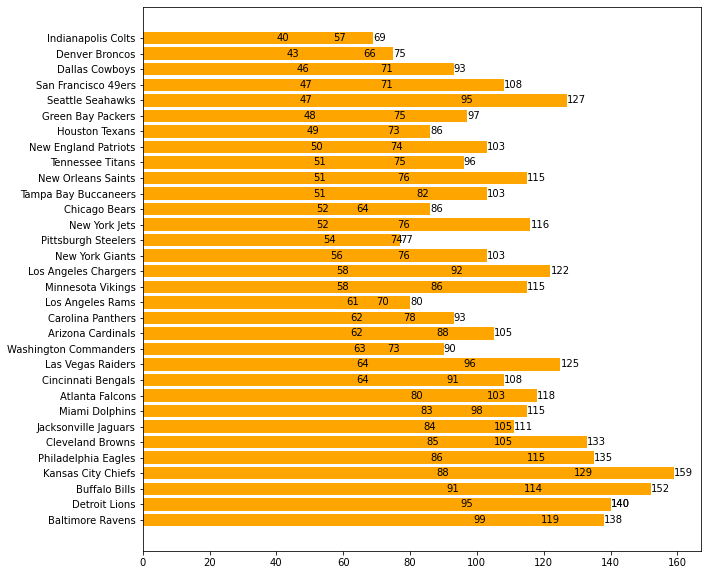

In [65]:
plt.figure(figsize=(10, 10))

barhplot = plt.barh(three_datasets.team, three_datasets.points_scored, color = 'orange')
plt.bar_label(barhplot, labels = three_datasets.points_scored)
barhplot
# Explanation: 3 numbers on each bar = 3 weeks

### 3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

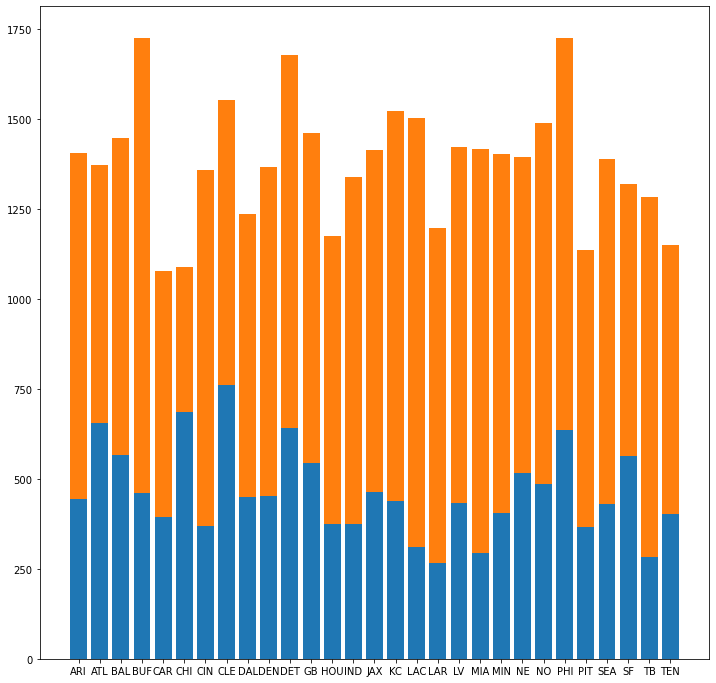

In [7]:
plt.figure(figsize = (12,12))

pass_yds = all_datasets.groupby('Abbreviation').passing_yards.mean()
rush_yds = all_datasets.groupby('Abbreviation').rushing_yards.mean()


plt.bar(pass_yds.index, rush_yds, label = 'Passing Yards');
plt.bar(pass_yds.index, pass_yds, bottom = rush_yds, label = 'Rushing Yards');

### 4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

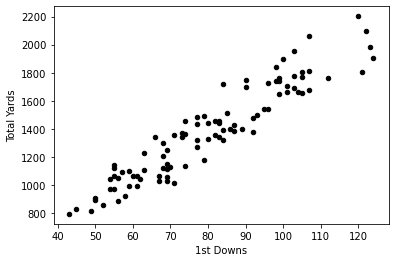

In [8]:
# this one works too, just no labels:
# plt.scatter( x= df['1st_downs'],y = df.total_yards, c= 'black')

three_datasets.plot.scatter(x ='1st_downs', y='total_yards',                      
                       c='black',
                       xlabel = '1st Downs',
                       ylabel = 'Total Yards',
                       );                       

### 5. Plot the penalty yards for the Baltimore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

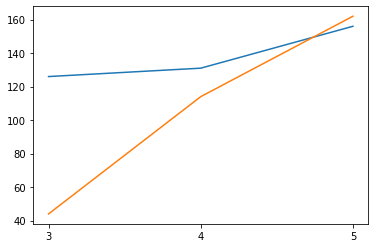

In [9]:
# penalty_yards for Baltimore Ravens and LA Rams each week

plt.figure()

# try again:
team1 = all_datasets[all_datasets.team.isin(['Baltimore Ravens'])]
team2 = all_datasets[all_datasets.team.isin(['Los Angeles Rams'])]
# picked_team = [all_datasets.team.isin(['Baltimore Ravens', 'Los Angeles Rams'])]

# team1['penalty_yards'].plot.line()
# plt.plot(team1.penalty_yards)
plt.plot(team2.Week, team2.penalty_yards);
plt.plot(team1.Week, team1.penalty_yards);

### 6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).( Scatter plot)

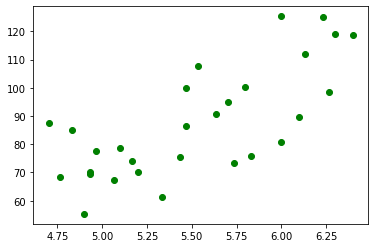

In [50]:
points_mean = all_datasets.groupby('Abbreviation').points_scored.mean()

yards_play = all_datasets.groupby('Abbreviation').yards_per_play.mean()

# plt.scatter(x = all_datasets.team, y = all_datasets.yards_per_play);
# plt.scatter(x = all_datasets.team, y = all_datasets.points_scored, c = 'blue');

plt.scatter( yards_play, points_mean, color = 'green');
# plt.scatter( points_mean, all_datasets.team, color = 'red' )

### 7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

C:\Users\ed2to\AppData\Local\Temp\ipykernel_7476\2214474640.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nfc_west = in_nfc[all_datasets.Division.isin( ['West'] )]


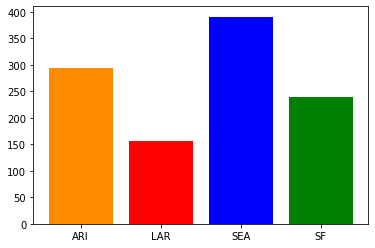

In [48]:
# penalty_yards
in_nfc = all_datasets[all_datasets.Conference.isin( ['NFC'] )]
nfc_west = in_nfc[all_datasets.Division.isin( ['West'] )]
nfc_west

plt.bar(nfc_west.Abbreviation, nfc_west.penalty_yards, color = ['blue','red', 'darkorange', 'green']);

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

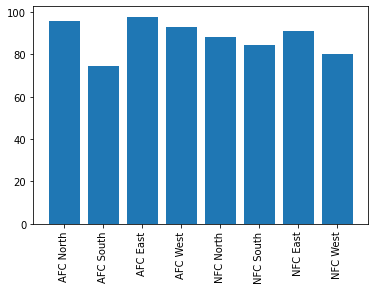

In [149]:
# plt.barh(afc_west.Week,nfc_west.points_scored, afc_east.Week); 
# or
# plt.figure(figsize = (5,5))
# plt.barh(all_datasets.Division ,all_datasets['team'])

# I got assistance for this problem:
conf_list = ['AFC', 'NFC']
division = ['North', 'South', 'East', 'West']
x = []
y= []

for conf in conf_list:
    for div in division:
        merged = (all_datasets['Conference'] == conf) & (all_datasets['Division'] == div)
        points_ave = all_datasets[merged].points_scored.mean()
        x.append(f'{conf} {div}')
        y.append(points_ave)
plt.bar(x,y)
plt.xticks(x, rotation = 'vertical');
